## TEAM MEMBERS:

---

ANU VARSHINI R

ABISHEK SRIKANTH

CHRISTINA DEMY NETRO





In [24]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_excel("/content/ORDER BOOK.xlsx")

## Descriptive Analysis

In [26]:
df.head()

,record_indi,segment,order_no,Transaction time,Transaction date,buy_sell,activity,symbol,series,vol_discl,vol_original,limit_pr,trigger_pr,mktor_flag,stop_loss_flag,io_flag,algo_id,client_id
0,PO,CASH,1000000000004170,1941-06-13 09:00:00.153,2021-06-14 09:00:00.153,S,Order Entry,bbADANIENT,EQ,0,5000,144145,0,N,N,N,Non-Algo,Non CP - Non Prop
1,PO,CASH,1000000000004180,1941-06-13 09:00:00.153,2021-06-14 09:00:00.153,B,Order Entry,bBAJAJHIND,EQ,0,250000,1625,0,N,N,N,Non-Algo,Non CP - Non Prop
2,PO,CASH,1000000000004180,1941-06-13 09:00:00.153,2021-06-14 09:00:00.153,B,Order Entry,bBAJAJHIND,EQ,0,500000,1625,0,N,N,N,Algo,Non CP - Non Prop
3,PO,CASH,1000000000004180,1941-06-13 09:00:00.157,2021-06-14 09:00:00.157,B,Order Entry,3IINFOTECH,BE,0,150000,955,0,N,N,N,Non-Algo,Prop
4,PO,CASH,1000000000004180,1941-06-13 09:00:00.157,2021-06-14 09:00:00.157,B,Order Entry,bDHARSUGAR,EQ,0,25000,1655,0,N,N,N,Algo,Non CP - Non Prop


In [27]:
df.columns

Index(['record_indi', 'segment', 'order_no', 'Transaction time ',
       'Transaction date', 'buy_sell', 'activity', 'symbol', 'series',
       'vol_discl', 'vol_original', 'limit_pr', 'trigger_pr', 'mktor_flag',
       'stop_loss_flag', 'io_flag', 'algo_id', 'client_id'],
      dtype='object')

In [28]:
df.describe()

,order_no,vol_discl,vol_original,limit_pr,trigger_pr
count,5.000000e+05,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05
mean,1.000000e+15,64.257374,5.314965e+02,1.215894e+05,7.838420e+02
std,1.051795e+05,831.043485,7.070699e+03,2.326892e+05,1.773541e+04
min,1.000000e+15,0.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+15,0.000000,1.000000e+01,1.287500e+04,0.000000e+00
50%,1.000000e+15,0.000000,5.000000e+01,4.857000e+04,0.000000e+00
75%,1.000000e+15,14.000000,2.000000e+02,1.304125e+05,0.000000e+00
max,1.000000e+15,234000.000000,2.000000e+06,3.138000e+06,2.630110e+06


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   record_indi        500000 non-null  object        
 1   segment            500000 non-null  object        
 2   order_no           500000 non-null  int64         
 3   Transaction time   500000 non-null  datetime64[ns]
 4   Transaction date   500000 non-null  datetime64[ns]
 5   buy_sell           500000 non-null  object        
 6   activity           500000 non-null  object        
 7   symbol             500000 non-null  object        
 8   series             499998 non-null  object        
 9   vol_discl          500000 non-null  int64         
 10  vol_original       500000 non-null  int64         
 11  limit_pr           500000 non-null  int64         
 12  trigger_pr         500000 non-null  int64         
 13  mktor_flag         500000 non-null  object  

## Data Cleaning

In [30]:
df.drop(['Transaction time '], axis=1,inplace=True)
df=df[df.series == 'EQ']
df=df[df.vol_discl !=0]
df=df[df.limit_pr !=0]
df=df[df.record_indi == "RM"]
df['limit_pr']=df['limit_pr']/100
df.head(3)

,record_indi,segment,order_no,Transaction date,buy_sell,activity,symbol,series,vol_discl,vol_original,limit_pr,trigger_pr,mktor_flag,stop_loss_flag,io_flag,algo_id,client_id
238382,RM,CASH,1000000000259110,2021-06-14 09:15:00.009,S,Order Entry,bbbDHANUKA,EQ,21,200,970.0,0,N,N,N,Non-Algo,Non CP - Non Prop
238383,RM,CASH,1000000000259110,2021-06-14 09:15:00.009,S,Order Entry,bbbDHANUKA,EQ,21,200,990.0,0,N,N,N,Non-Algo,Non CP - Non Prop
238384,RM,CASH,1000000000259110,2021-06-14 09:15:00.009,S,Order Entry,bbbDHANUKA,EQ,21,200,1010.0,0,N,N,N,Non-Algo,Non CP - Non Prop


## Exploratory Data Analysis

In [31]:
df.symbol.value_counts()[:15]

bbbbbbBHEL    5964
AUROPHARMA    4909
bDEEPAKNTR    4693
BAJFINANCE    4646
bbbbbbbDLF    4518
bBATAINDIA    4456
ASIANPAINT    4093
bbbDRREDDY    3987
bbALOKINDS    3826
bbAXISBANK    3825
bbbbbbBEML    3748
bbAARTIIND    3538
bbbbbALKEM    2960
bCOALINDIA    2853
BHARTIARTL    2820
Name: symbol, dtype: int64

In [32]:
df.activity.value_counts()

Order Mod       122127
Order Entry      36453
Order Cancel     12490
Name: activity, dtype: int64

In [33]:
df.order_no.nunique()

9264

## LOB Model

In [34]:
def stock(name):
  stock=df[df.symbol == name]
  buy_orders=stock[stock.buy_sell=='B']
  buy_orders1=buy_orders.drop_duplicates(subset='order_no', keep="last")
  buy_orders1= buy_orders1[buy_orders1.activity != "Order Cancel"]
  buy_side=buy_orders1.sort_values(by = ['limit_pr', 'Transaction date'], ascending = [False, True])
  sell_orders=stock[stock.buy_sell=='S']
  sell_orders1=sell_orders.drop_duplicates(subset='order_no', keep="last")
  sell_orders1= sell_orders1[sell_orders1.activity != "Order Cancel"]
  sell_side=sell_orders1.sort_values(by = ['limit_pr', 'Transaction date'], ascending = [True, True])
  return buy_side,sell_side

In [35]:
# Choosing Bharti Airtel
buy,sell=stock("BHARTIARTL")

In [36]:
top_20_buy=buy[['vol_discl','limit_pr']].head(20)
top_20_buy=top_20_buy.reset_index(drop=True)
top_20_buy

,vol_discl,limit_pr
0,49,540.85
1,100,540.45
2,100,540.15
3,22,540.10
4,124,540.10
5,40,540.00
6,100,539.60
7,40,539.60
8,150,539.50
9,44,539.45


In [37]:
top_20_buy.describe()

,vol_discl,limit_pr
count,20.000000,20.000000
mean,94.150000,539.642500
std,47.173002,0.469119
min,22.000000,539.150000
25%,43.000000,539.300000
50%,100.000000,539.425000
75%,145.500000,540.025000
max,150.000000,540.850000


In [38]:
print(np.median(top_20_buy.vol_discl))

100.0


In [39]:
top_20_sell=sell[['vol_discl','limit_pr']].head(20)
top_20_sell=top_20_sell.reset_index(drop=True)
top_20_sell

,vol_discl,limit_pr
0,62,538.65
1,306,538.95
2,119,538.95
3,40,539.00
4,100,539.00
5,40,539.10
6,100,539.15
7,40,539.15
8,40,539.25
9,40,539.25


In [40]:
top_20_sell.describe()

,vol_discl,limit_pr
count,20.00000,20.000000
mean,104.15000,539.185000
std,71.71308,0.193377
min,40.00000,538.650000
25%,40.00000,539.075000
50%,100.00000,539.250000
75%,144.00000,539.312500
max,306.00000,539.450000


In [41]:
print(np.median(top_20_sell.vol_discl))

100.0


In [44]:
lob=pd.concat([top_20_buy, top_20_sell], axis=1)
# lob.rename(columns = {'vol_discl':'Bid Volume', 'limit_pr':'Bid limit Price',
                              # 'vol_discl':'Ask Volume', 'limit_pr':'Ask limit Price'}, inplace = True)
lob.columns = ['Bid Volume','Bid limit Price','Ask Volume','Ask limit Price']

In [45]:
lob

,Bid Volume,Bid limit Price,Ask Volume,Ask limit Price
0,49,540.85,62,538.65
1,100,540.45,306,538.95
2,100,540.15,119,538.95
3,22,540.10,40,539.00
4,124,540.10,100,539.00
5,40,540.00,40,539.10
6,100,539.60,100,539.15
7,40,539.60,40,539.15
8,150,539.50,40,539.25
9,44,539.45,40,539.25


In [53]:
def impact_cost(order, buy_or_sell):
  if buy_or_sell=='S':
    data=buy
  elif buy_or_sell == 'B':
    data=sell
  sum=0
  total_value=0
  limit_list=[]
  for index, row in data.iterrows():
      if order >= sum :
        sum =sum+ row['vol_discl']
        total_value= total_value + (row['vol_discl']*row['limit_pr'])
        limit_list.append(row['limit_pr'])
        # print(row['vol_discl'],row['limit_pr'])
        # print(total_value)
        # print(limit_list)
      else:
        break
  total_value-=(sum-order)*limit_list[-1]
  midpoint_quote=(top_20_buy.iloc[0,1]+top_20_sell.iloc[0,1])/2
  weighted_avg=total_value/order
  impact_cost= abs(midpoint_quote-weighted_avg)/midpoint_quote
    
  return impact_cost

In [61]:
impact_cost_buy=[]
impact_cost_sell=[]
quantity=[]
for a in range(1000,5000,50):
  impact_cost_buy.append(impact_cost(a,'S'))
  impact_cost_sell.append(impact_cost(a,'B'))
  quantity.append(a)

In [62]:
# print(quantity)
# print(impact_cost_buy)
# print(impact_cost_sell)
plot_df = pd.DataFrame(list(zip(quantity, impact_cost_buy,impact_cost_sell)),
               columns =['Quantity', 'Impact cost for Sell','Impact cost for Buy'])
# plot_df

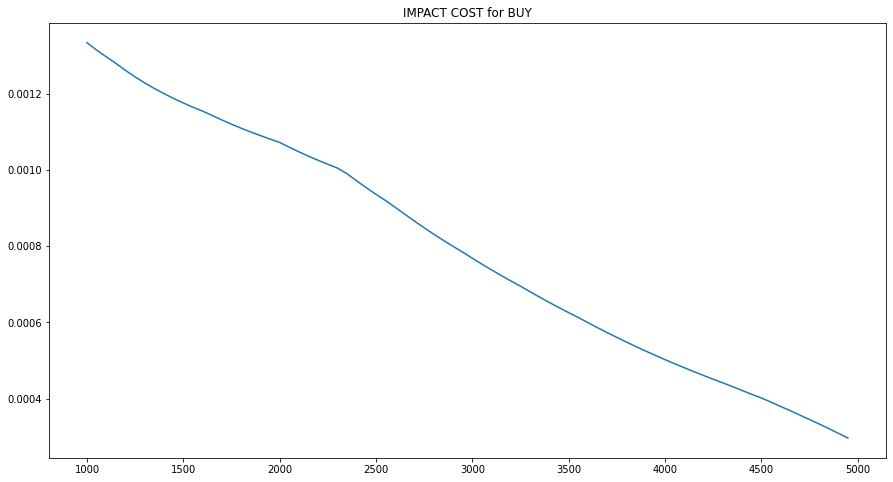

In [69]:
plt.figure(figsize=(15, 8))
plt.plot('Quantity','Impact cost for Buy',data=plot_df, label = "Impact cost for Buy")
plt.title("IMPACT COST for BUY")
plt.show()

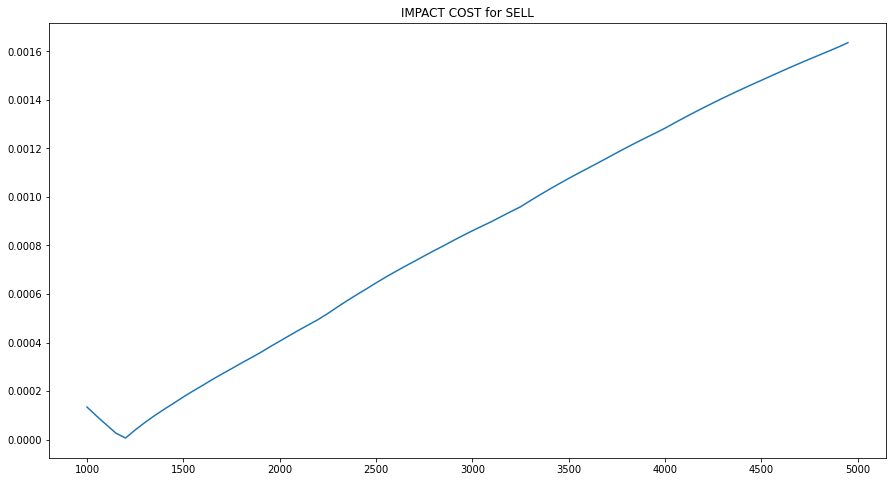

In [70]:
plt.figure(figsize=(15, 8))
plt.plot('Quantity', 'Impact cost for Sell' , data=plot_df, label = "Impact cost for Sell")
plt.title("IMPACT COST for SELL")
plt.show()

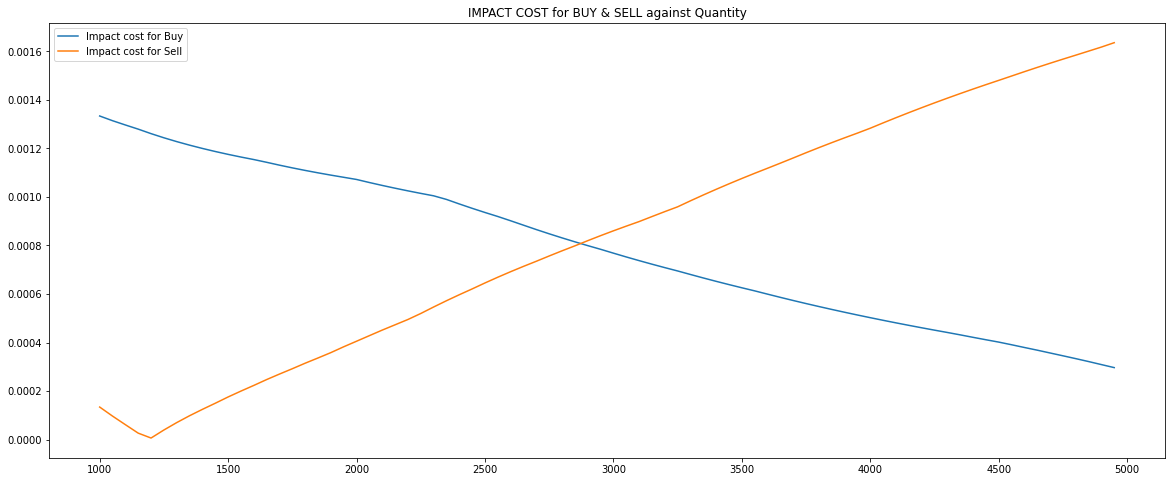

In [65]:
plt.figure(figsize=(20, 8))
plt.plot('Quantity','Impact cost for Buy',data=plot_df, label = "Impact cost for Buy")
plt.plot('Quantity', 'Impact cost for Sell' , data=plot_df, label = "Impact cost for Sell")
plt.title("IMPACT COST for BUY & SELL against Quantity")
plt.legend()
plt.show()